In [8]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import os
import pandas as pd
import re
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #解决图像中的“-”负号的乱码问题


def juecheshu(data_name,max_depth,min_samples_leaf):

    # 1.数据读取与预处理
    df = pd.read_excel(data_name)
    # 2.提取特征变量和目标变量
    X = df.iloc[:,1:15]
    from sklearn.preprocessing import LabelEncoder
    class_le = LabelEncoder()
    y =class_le.fit_transform(df['Types'].values)

    # 3.划分训练集和测试集
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=231)
    # 4.模型训练及搭建
    
    model = DecisionTreeClassifier(max_depth=max_depth,min_samples_leaf=min_samples_leaf, random_state=123) 
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred = model.predict(X_test)
    a = pd.DataFrame() 
    a['预测值'] = list(y_pred)
    a['实际值'] = list(y_test)
    score = roc_auc_score(y_test, y_pred_proba[:,1])
    print('AUC=',score)
    return model,X_train,y_pred, y_test,y_pred_proba



def jcs_pic(model,X_train):

    dot_data = export_graphviz(model, out_file=None, feature_names=X_train.columns, class_names=['Lead and barium', 'High potassium'], rounded=True, filled=True)
    # rounded与字体有关，filled设置颜色填充
    f = open('dot_data.txt', 'w')
    f.write(dot_data)
    f.close()

    #修改字体设置，避免中文乱码
    
    f_old = open('dot_data.txt', 'r')
    f_new = open('dot_data_new.txt', 'w', encoding='utf-8')
    for line in f_old:
        if 'fontname' in line:
            font_re = 'fontname=(.*?)]'
            old_font = re.findall(font_re, line)[0]
            line = line.replace(old_font, 'SimHei')
        f_new.write(line)
    f_old.close()
    f_new.close()

    os.system('dot -Tpng dot_data_new.txt -o Decision_tree.png') # 需要先在电脑中安装 Graphviz
    print('Decision_tree.pngHas been saved in the folder where the code is located!')


def plot_ROC(fpr,tpr):
    # 绘制ROC曲线
    plt.figure(figsize=(16,9), dpi=300)
    plt.plot(fpr, tpr)
    plt.title('ROC')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()


def predict_data(model):
    data1=pd.read_excel("./附件.xlsx",sheet_name="表单3")
    data=data1.iloc[:,2:16]
    leixing=model.predict(data)
    leixing2=[]
    for i in leixing:
        if i==1:
            leixing2.append("高钾")
        else:
            leixing2.append("铅钡")
    for i in range(len(data)):
        data1.loc[i,"类型"]=leixing2[i]
    
    data1.to_excel("预测玻璃类型.xlsx",index=False)



AUC= 1.0
Decision_tree.pngHas been saved in the folder where the code is located!


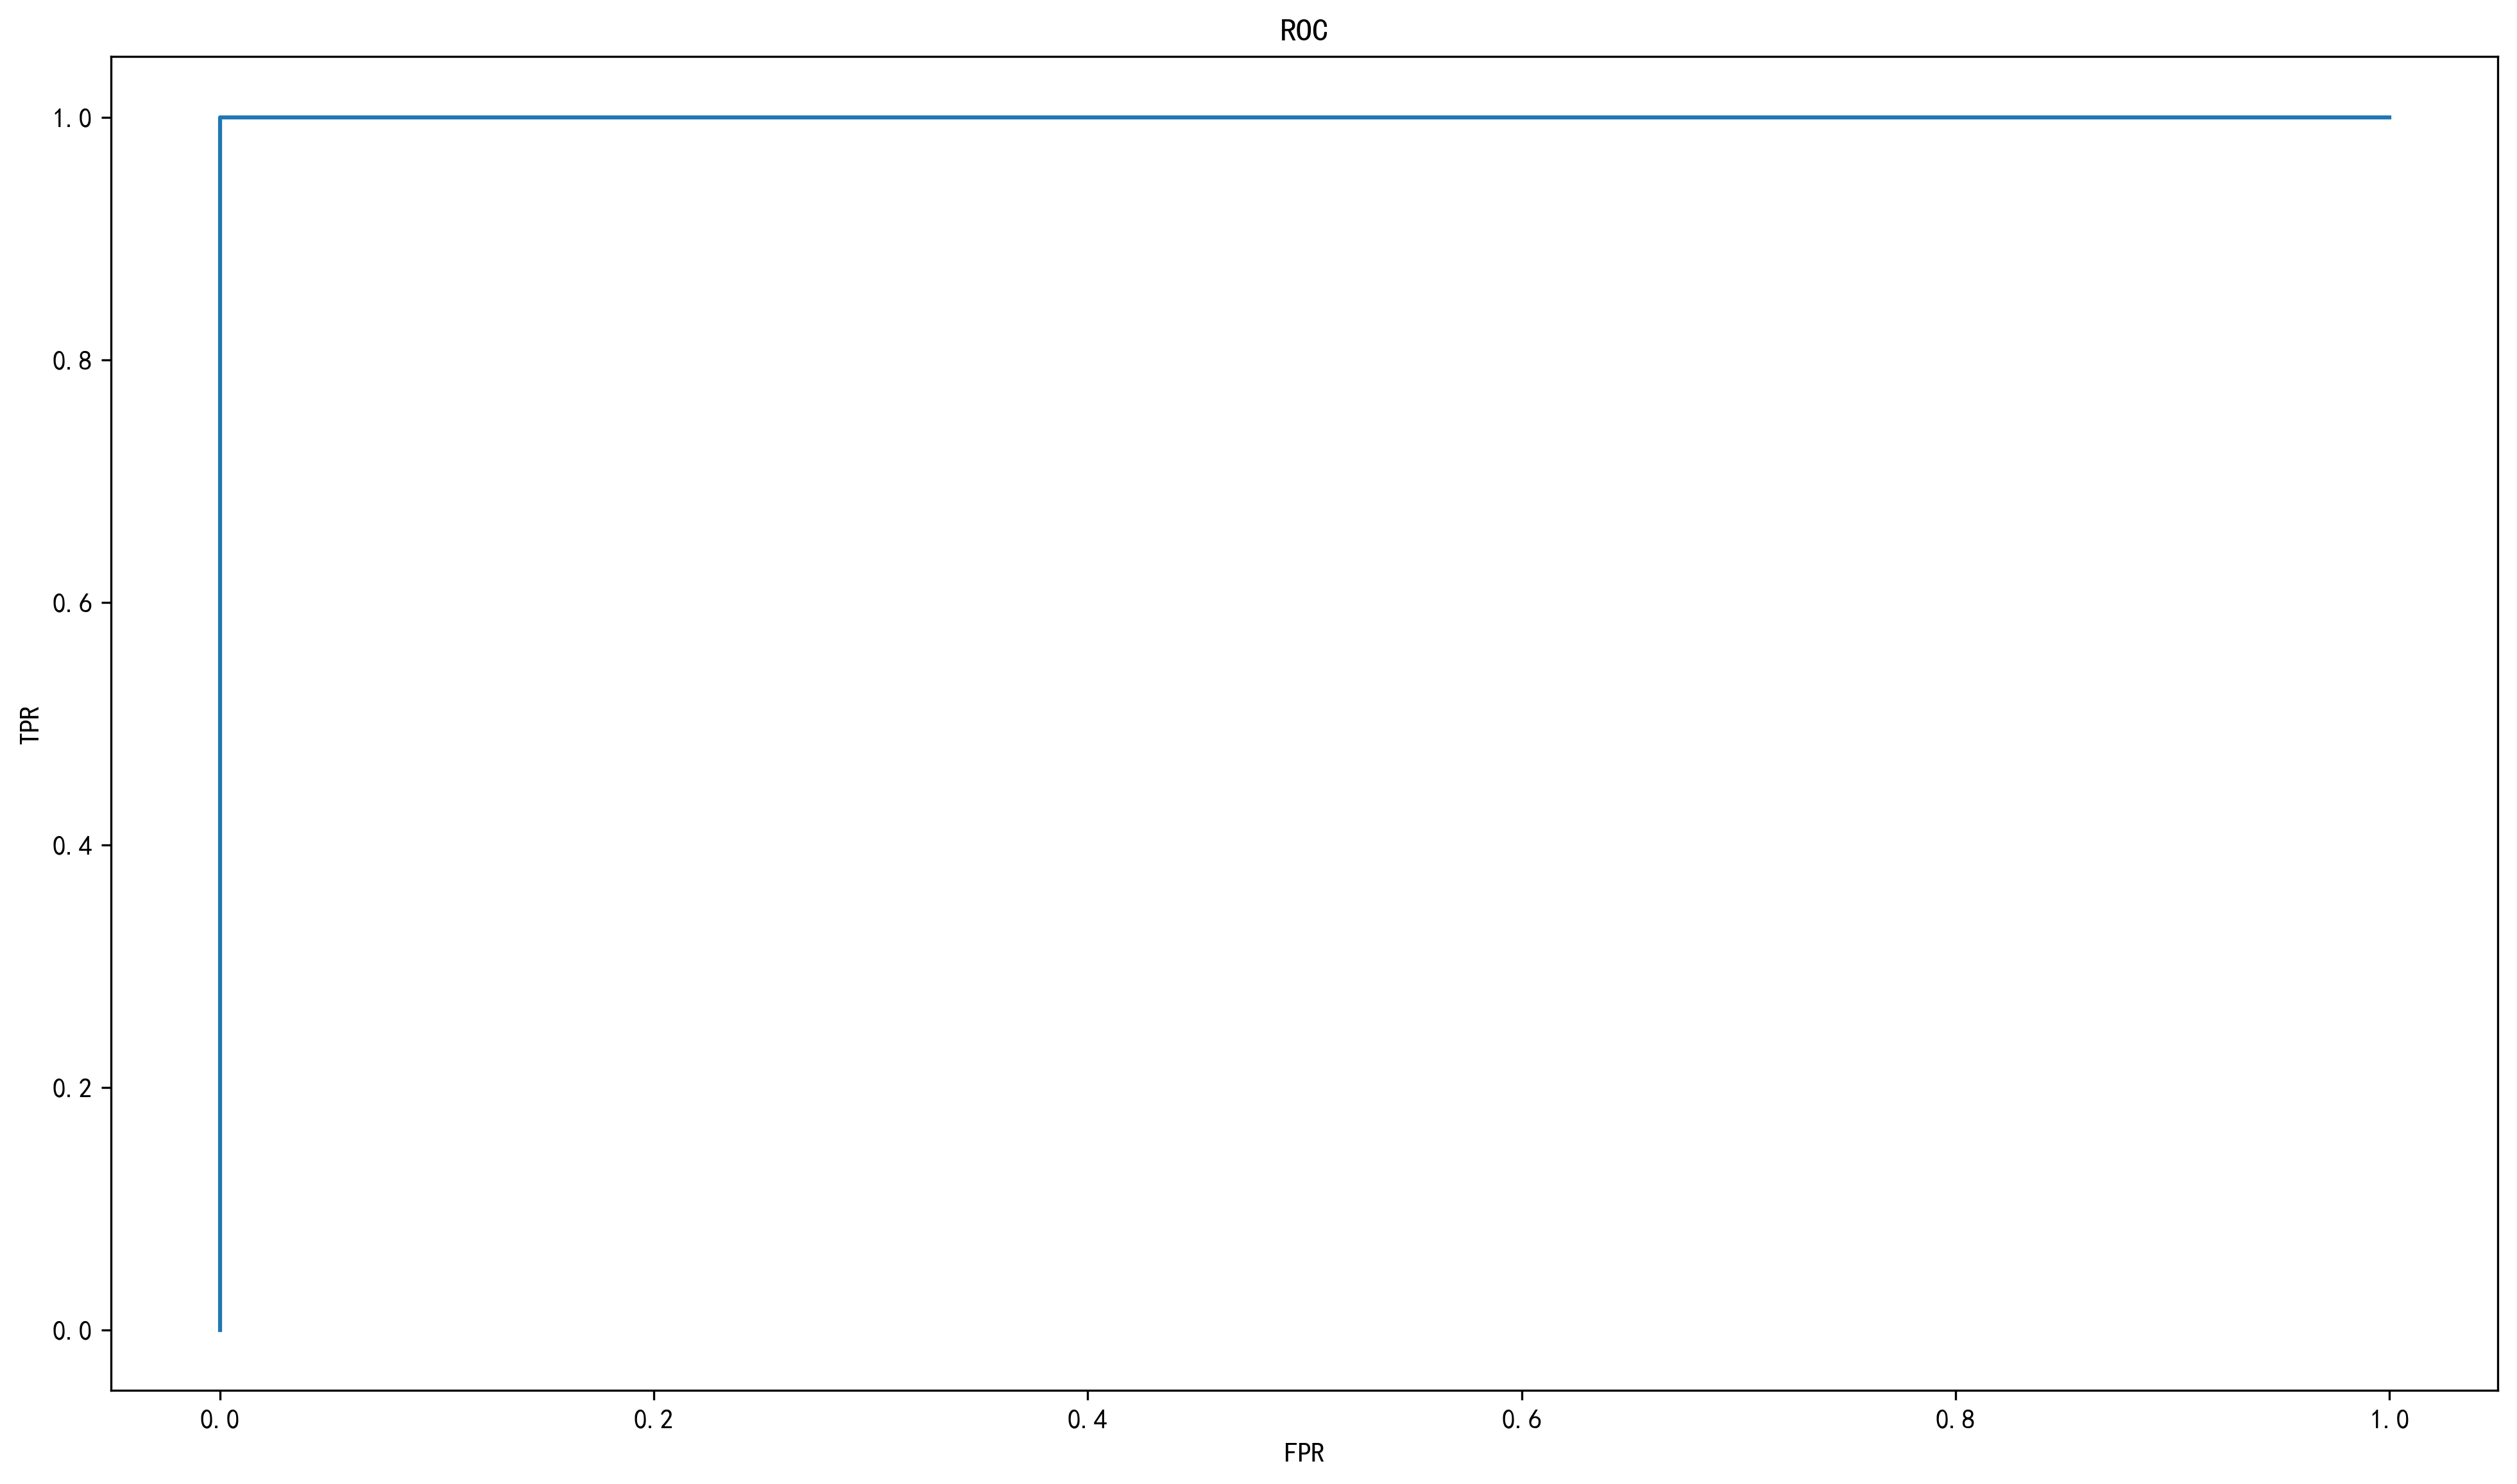

In [9]:
if __name__ == '__main__':


    [model,X_train,y_pred, y_test,y_pred_proba]=juecheshu('./合并表格.xlsx',6,7)
    jcs_pic(model,X_train)
    fpr, tpr, thres= roc_curve(y_test, y_pred_proba[:,1])
    plot_ROC(fpr,tpr)
    # predict_data(model)
